In [1]:
#Install mlxtend
!pip install mlxtend

In [2]:
#import all necessary libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from mlxtend.feature_selection import SequentialFeatureSelector
import statsmodels.regression.linear_model as stm

In [3]:
#import churn dataset
churn_data = pd.read_csv("C:/Users/sered/OneDrive/Desktop/WGU Masters Degree/D208/churn_clean.csv")

churn_data.head(5)

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,...,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,...,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,...,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,...,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,...,149.948316,271.493436,4,4,4,3,4,4,4,5


In [4]:
#check for duplicate values
print(churn_data.duplicated().value_counts())

False    10000
Name: count, dtype: int64


In [5]:
#check for missing values
churn_data.isnull().sum()

CaseOrder                  0
Customer_id                0
Interaction                0
UID                        0
City                       0
State                      0
County                     0
Zip                        0
Lat                        0
Lng                        0
Population                 0
Area                       0
TimeZone                   0
Job                        0
Children                   0
Age                        0
Income                     0
Marital                    0
Gender                     0
Churn                      0
Outage_sec_perweek         0
Email                      0
Contacts                   0
Yearly_equip_failure       0
Techie                     0
Contract                   0
Port_modem                 0
Tablet                     0
InternetService         2129
Phone                      0
Multiple                   0
OnlineSecurity             0
OnlineBackup               0
DeviceProtection           0
TechSupport   

In [6]:
#change the "None" value in column InternetService to "Not Provided" because we need that data without it appearing as null
churn_data['InternetService'] = churn_data['InternetService'].fillna('Not Provided')

In [7]:
#verify change worked correctly
churn_data['InternetService'].head(10)

0     Fiber Optic
1     Fiber Optic
2             DSL
3             DSL
4     Fiber Optic
5    Not Provided
6             DSL
7             DSL
8             DSL
9     Fiber Optic
Name: InternetService, dtype: object

In [8]:
#verify that there are no longer "null" values in the InternetService column
churn_data.isnull().sum()

CaseOrder               0
Customer_id             0
Interaction             0
UID                     0
City                    0
State                   0
County                  0
Zip                     0
Lat                     0
Lng                     0
Population              0
Area                    0
TimeZone                0
Job                     0
Children                0
Age                     0
Income                  0
Marital                 0
Gender                  0
Churn                   0
Outage_sec_perweek      0
Email                   0
Contacts                0
Yearly_equip_failure    0
Techie                  0
Contract                0
Port_modem              0
Tablet                  0
InternetService         0
Phone                   0
Multiple                0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMovies         0
PaperlessBilling        0
PaymentMetho

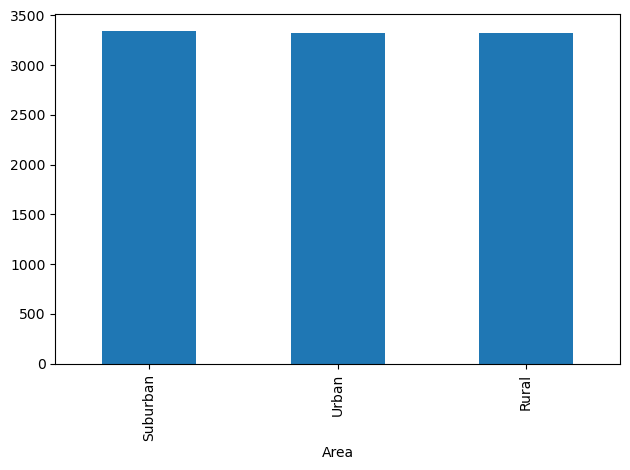

In [9]:
#check for outliers in my explanatory variables
#check for any unexpected values in the Area column using a bar chart
churn_data['Area'].value_counts().plot(kind='bar')
plt.tight_layout()

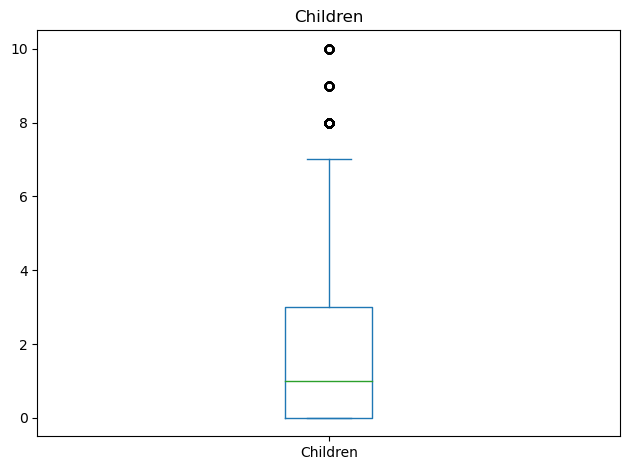

In [10]:
#check for any unexpected values in the Children column using a box plot
churn_data['Children'].plot(kind='box', title='Children')
plt.tight_layout()

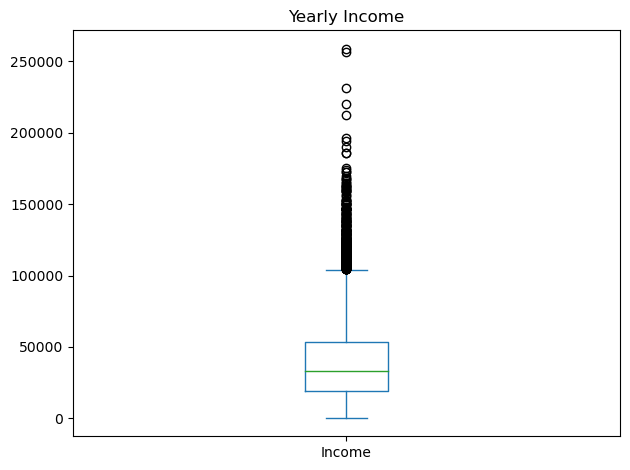

In [11]:
#check for outliers in the income column using a box plot
churn_data['Income'].plot(kind='box', title='Yearly Income')
plt.tight_layout()

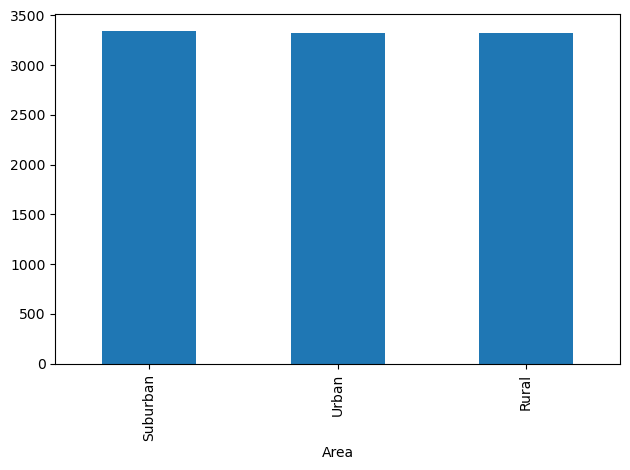

In [12]:
#check for outliers in the Marital Column using a bar chart
churn_data['Area'].value_counts().plot(kind='bar')
plt.tight_layout()

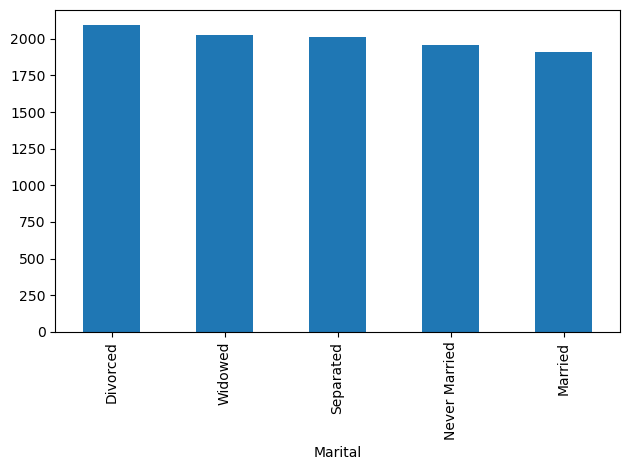

In [13]:
#check for outliers in the Marital Column using a bar chart
churn_data['Marital'].value_counts().plot(kind='bar')
plt.tight_layout()

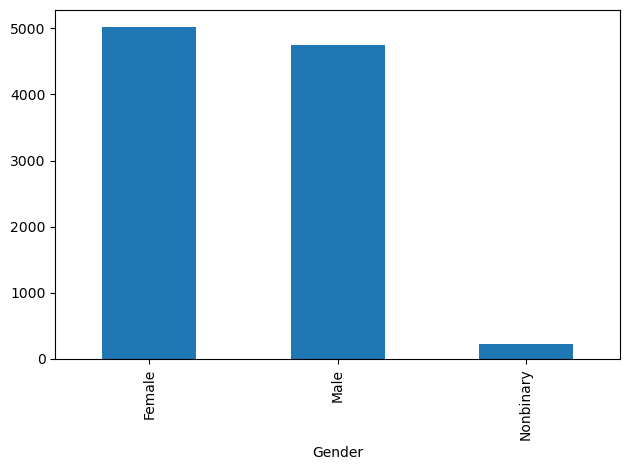

In [14]:
#check for outliers in the gender column using a bar chart
churn_data['Gender'].value_counts().plot(kind='bar')
plt.tight_layout()

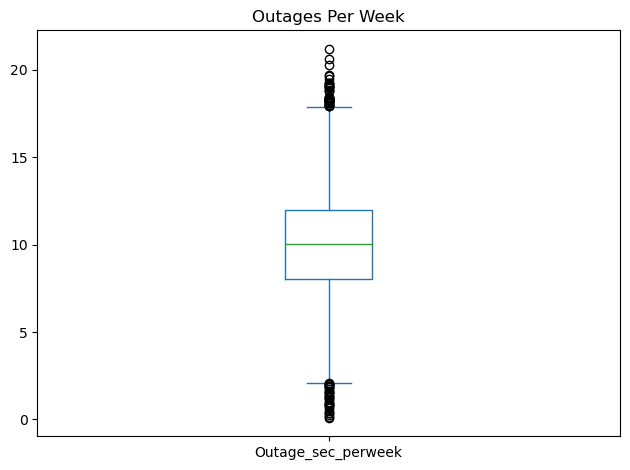

In [15]:
#check for outliers in the Outage_sec_perweek column using a box chart
churn_data['Outage_sec_perweek'].plot(kind='box', title='Outages Per Week')
plt.tight_layout()

In [16]:
#double check that there are no outages less than 0 seconds
outage_query = churn_data.query('Outage_sec_perweek < 0')
outage_query.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             0 non-null      int64  
 1   Customer_id           0 non-null      object 
 2   Interaction           0 non-null      object 
 3   UID                   0 non-null      object 
 4   City                  0 non-null      object 
 5   State                 0 non-null      object 
 6   County                0 non-null      object 
 7   Zip                   0 non-null      int64  
 8   Lat                   0 non-null      float64
 9   Lng                   0 non-null      float64
 10  Population            0 non-null      int64  
 11  Area                  0 non-null      object 
 12  TimeZone              0 non-null      object 
 13  Job                   0 non-null      object 
 14  Children              0 non-null      int64  
 15  Age                   0 non-null      in

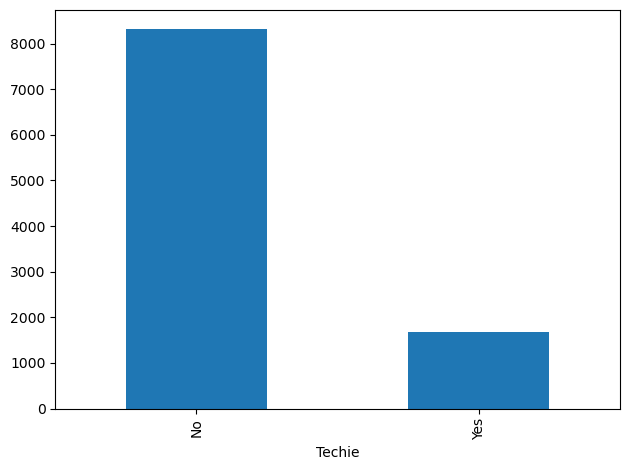

In [17]:
#check for outliers on the Techie column using a bar chart
churn_data['Techie'].value_counts().plot(kind='bar')
plt.tight_layout()

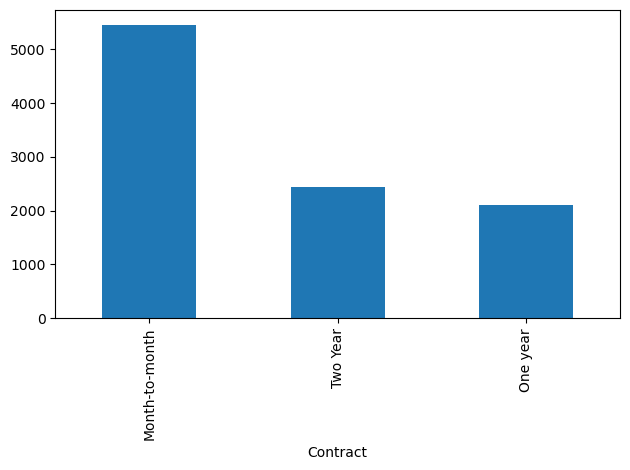

In [18]:
#check for outliers on the Contract column using a bar chart
churn_data['Contract'].value_counts().plot(kind='bar')
plt.tight_layout()

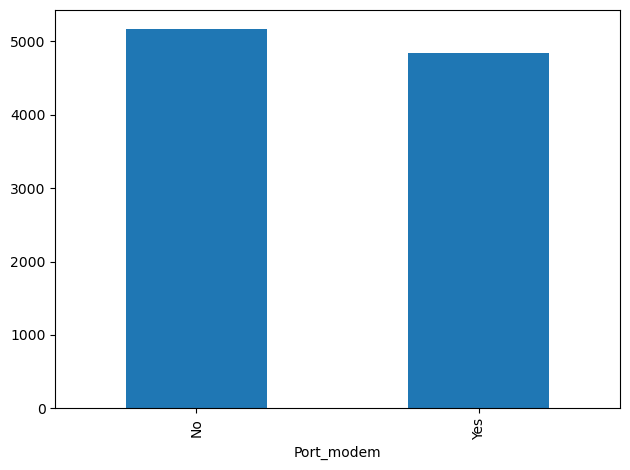

In [19]:
#check for outliers in the port_modem column using a bar chart
churn_data['Port_modem'].value_counts().plot(kind='bar')
plt.tight_layout()

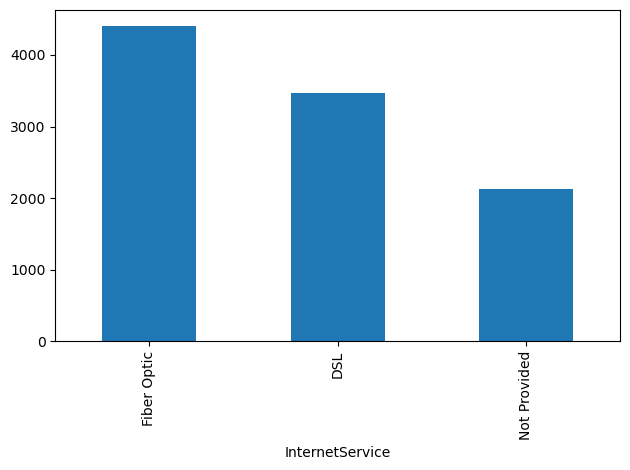

In [20]:
#check for outliers in the InternetService column using a bar chart
churn_data['InternetService'].value_counts().plot(kind='bar')
plt.tight_layout()

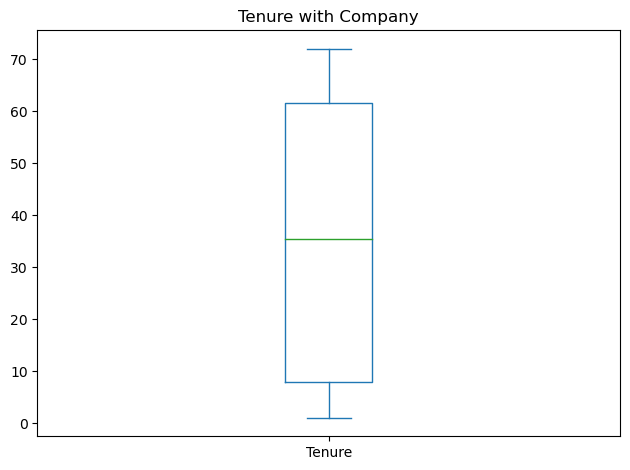

In [21]:
#check for outlieres in the Tenure column using a box chart
churn_data['Tenure'].plot(kind='box', title='Tenure with Company')
plt.tight_layout()

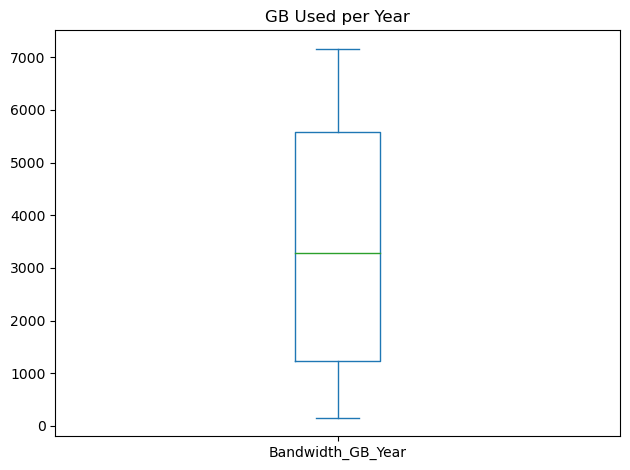

In [22]:
#check for outliers in my target varibale - Bandwidth_GB_Year - using a box chart
churn_data['Bandwidth_GB_Year'].plot(kind='box', title='GB Used per Year')
plt.tight_layout()

In [23]:
#Perform summary statistics on my variables to better understand the data on all continuous variables
churn_data['Bandwidth_GB_Year'].describe()

count    10000.000000
mean      3392.341550
std       2185.294852
min        155.506715
25%       1236.470827
50%       3279.536903
75%       5586.141370
max       7158.981530
Name: Bandwidth_GB_Year, dtype: float64

In [24]:
#Summary statistics for Area Column
churn_data['Children'].describe()

count    10000.0000
mean         2.0877
std          2.1472
min          0.0000
25%          0.0000
50%          1.0000
75%          3.0000
max         10.0000
Name: Children, dtype: float64

In [25]:
#Summary statistics for Area Column
churn_data['Income'].describe()

count     10000.000000
mean      39806.926771
std       28199.916702
min         348.670000
25%       19224.717500
50%       33170.605000
75%       53246.170000
max      258900.700000
Name: Income, dtype: float64

In [26]:
#Summary statistics for Area Column
churn_data['Outage_sec_perweek'].describe()

count    10000.000000
mean        10.001848
std          2.976019
min          0.099747
25%          8.018214
50%         10.018560
75%         11.969485
max         21.207230
Name: Outage_sec_perweek, dtype: float64

In [27]:
#Summary statistics for Area Column
churn_data['Tenure'].describe()

count    10000.000000
mean        34.526188
std         26.443063
min          1.000259
25%          7.917694
50%         35.430507
75%         61.479795
max         71.999280
Name: Tenure, dtype: float64

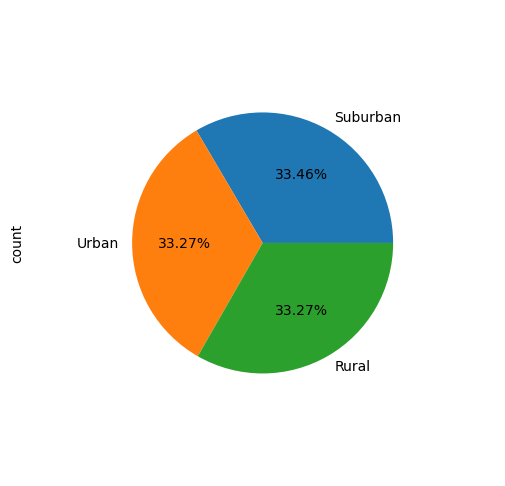

In [28]:
#Create a pie chart to show univariate visualization for the categorical variables
#These pie charts also show summary statistics for all of the categorical variables

churn_data['Area'].value_counts().plot(kind='pie', autopct = '%.2f%%', radius=.7)
plt.tight_layout(pad=0.5)

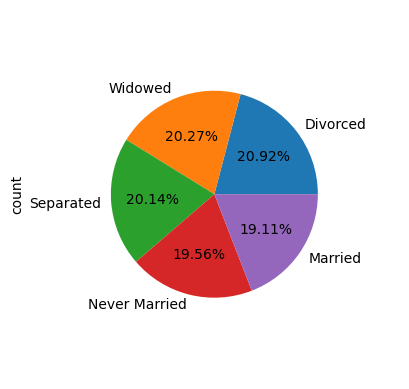

In [29]:
#Create univariate visualization and summary statistics for Marital column
churn_data['Marital'].value_counts().plot(kind='pie', autopct = '%.2f%%', radius=.7)
plt.show()

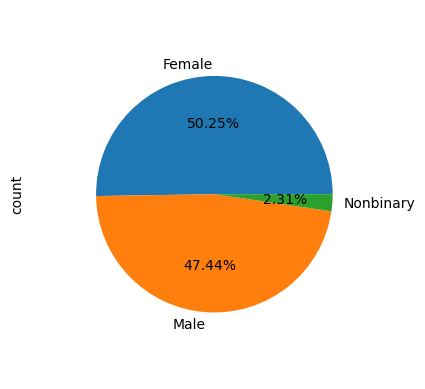

In [30]:
#Create a univariate visualization for Gender column
churn_data['Gender'].value_counts().plot(kind='pie', autopct='%.2f%%', radius=.8)
plt.show()

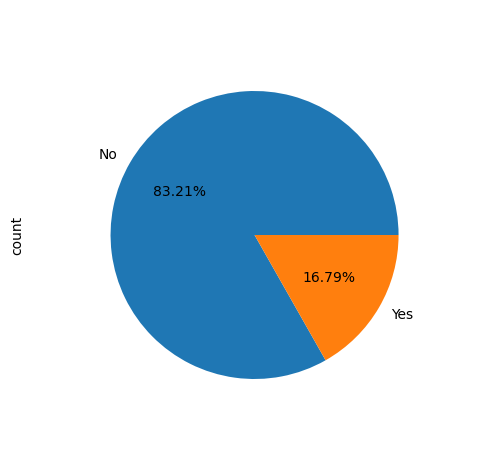

In [31]:
#Create a univariate visualization for Techie column
churn_data['Techie'].value_counts().plot(kind='pie', autopct='%.2f%%', radius=.8)
plt.tight_layout()

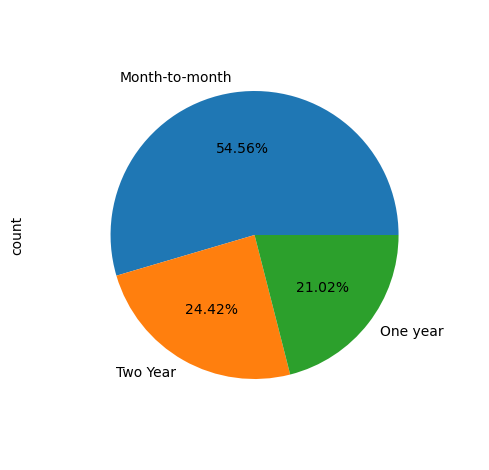

In [32]:
#Create a univariate visualization for Contract column
churn_data['Contract'].value_counts().plot(kind='pie', autopct='%.2f%%', radius=.8)
plt.tight_layout()

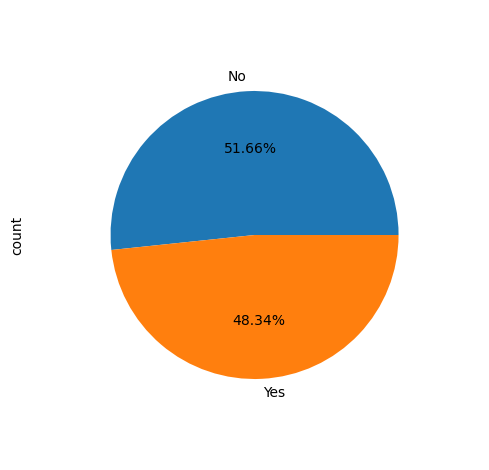

In [33]:
#Create univariate visualization for Port_modem column
churn_data['Port_modem'].value_counts().plot(kind='pie', autopct = '%.2f%%', radius=.8)
plt.tight_layout()

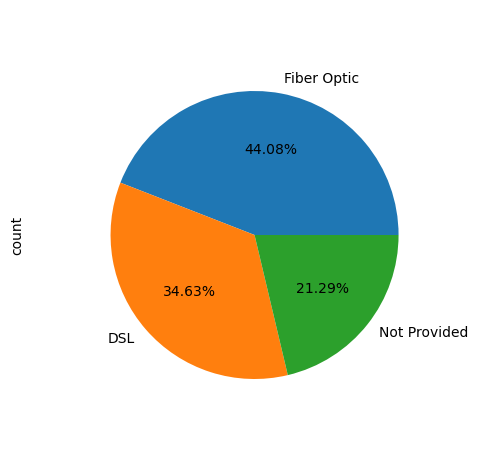

In [34]:
#Create a univariate visualization of the InternetService Column
churn_data['InternetService'].value_counts().plot(kind='pie', autopct = '%.2f%%', radius=.8)
plt.tight_layout()

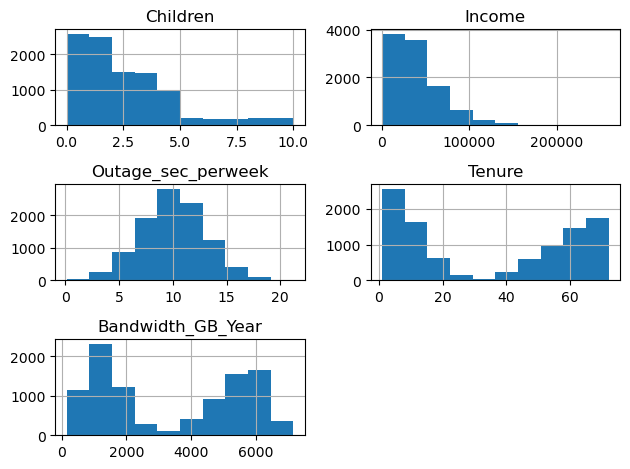

In [35]:
#Create a histogram for each variable to be used in testing - both dependent and independent - for a univariate visualization
churn_data[['Children','Income','Outage_sec_perweek','Tenure','Bandwidth_GB_Year']].hist()
plt.tight_layout()

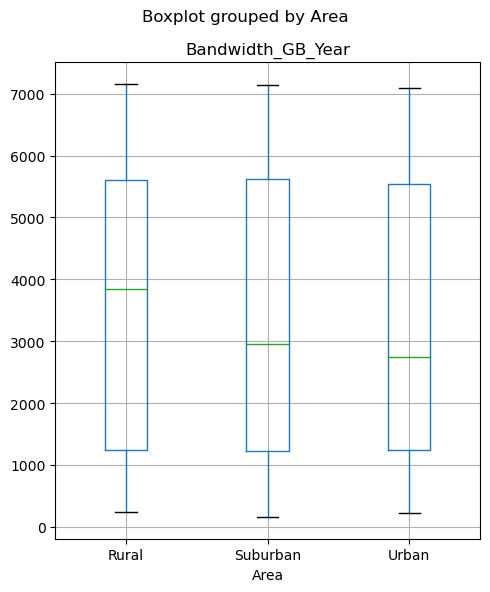

In [36]:
#Create a bivariate visualization to compare the target and explanatory variables
churn_data.boxplot(column='Bandwidth_GB_Year', by='Area', figsize=(5,6))
plt.tight_layout()

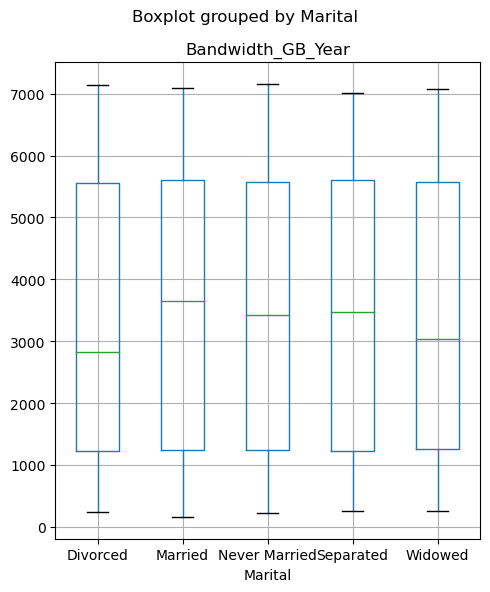

In [37]:
#Create a bivariate visualization to compare the target and explanatory variables
churn_data.boxplot(column='Bandwidth_GB_Year', by='Marital', figsize=(5,6))
plt.tight_layout()

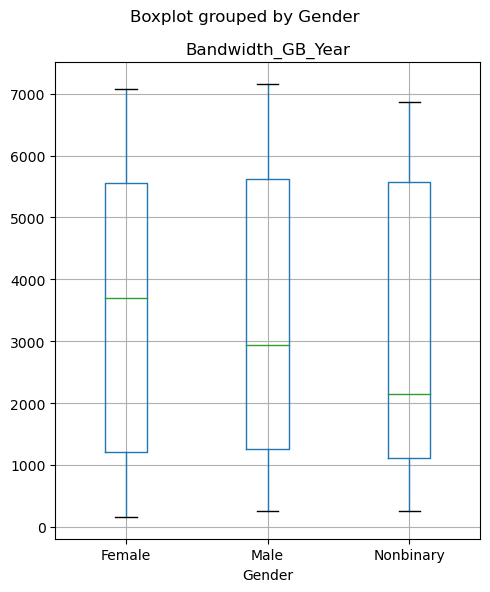

In [38]:
#Create a bivariate visualization to compare the target and explanatory variables
churn_data.boxplot(column='Bandwidth_GB_Year', by='Gender', figsize=(5,6))
plt.tight_layout()

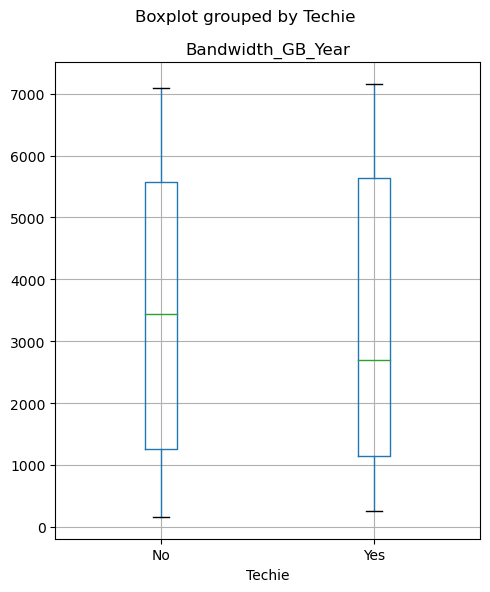

In [39]:
#Create a bivariate visualization to compare the target and explanatory variables
churn_data.boxplot(column='Bandwidth_GB_Year', by='Techie', figsize=(5,6))
plt.tight_layout()

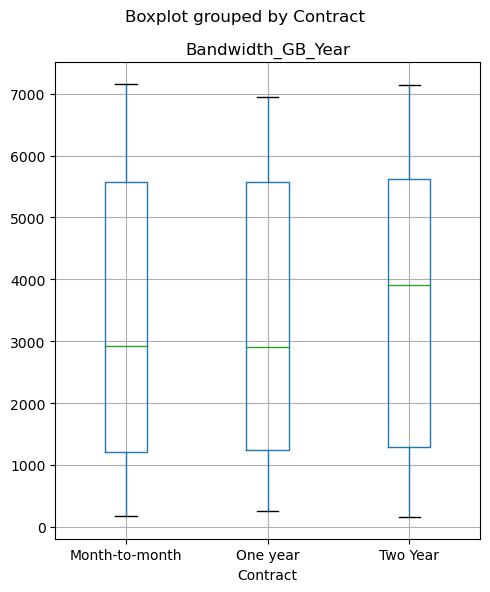

In [40]:
#Create a bivariate visualization to compare the target and explanatory variables
churn_data.boxplot(column='Bandwidth_GB_Year', by='Contract', figsize=(5,6))
plt.tight_layout()

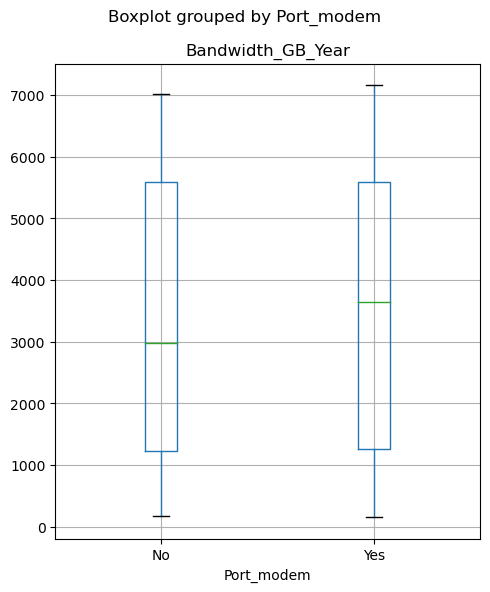

In [41]:
#Create a bivariate visualization to compare the target and explanatory variables
churn_data.boxplot(column='Bandwidth_GB_Year', by='Port_modem', figsize=(5,6))
plt.tight_layout()

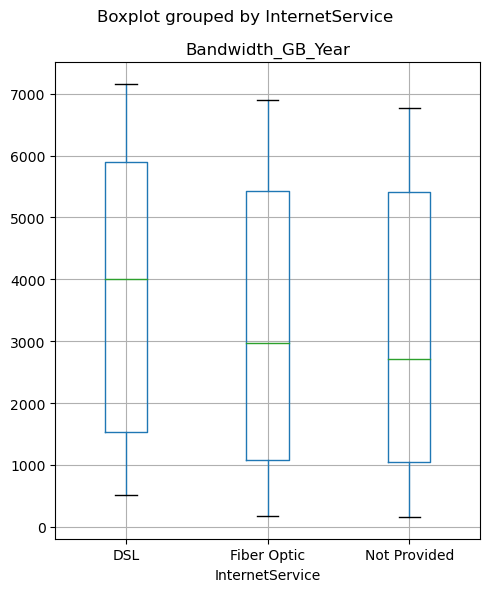

In [42]:
#Create a bivariate visualization to compare the target and explanatory variables
churn_data.boxplot(column='Bandwidth_GB_Year', by='InternetService', figsize=(5,6))
plt.tight_layout()

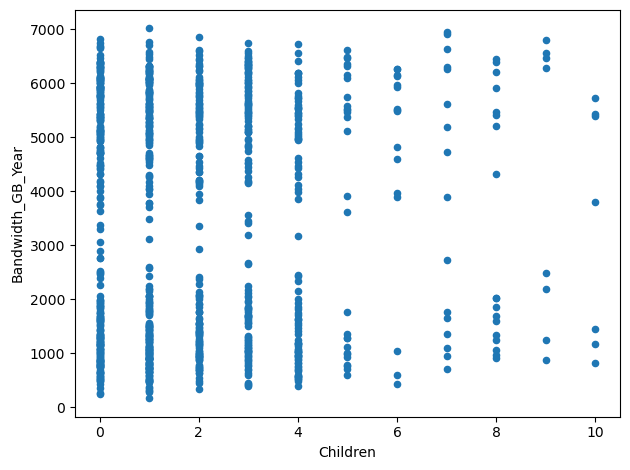

In [43]:
#Create a scatter plot to visualize the continuous variables and test for relationship
churn_data[churn_data['Bandwidth_GB_Year'] < 8000].sample(1000).plot.scatter(x='Children',
                                                                            y='Bandwidth_GB_Year')
plt.tight_layout()

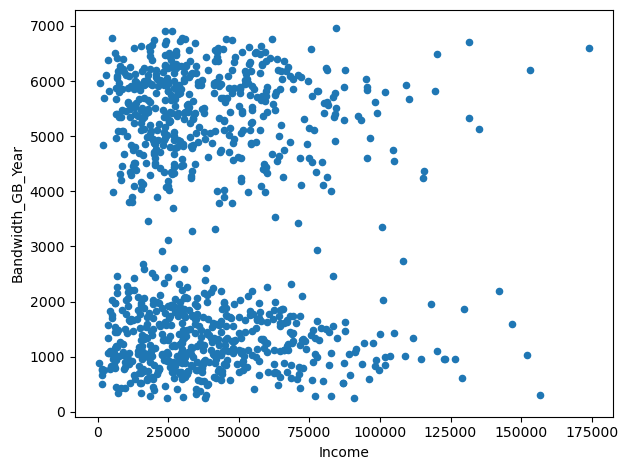

In [44]:
#Create a scatter plot to visualize the continuous variables and test for relationship
churn_data[churn_data['Bandwidth_GB_Year'] < 8000].sample(1000).plot.scatter(x='Income',
                                                                            y='Bandwidth_GB_Year')
plt.tight_layout()

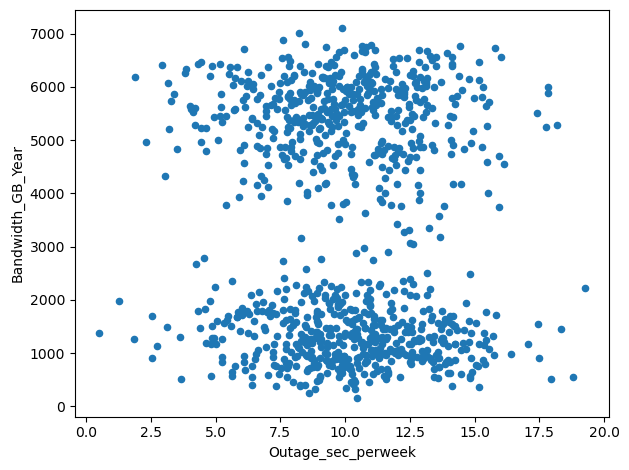

In [45]:
#Create a scatter plot to visualize the continuous variables and test for relationship
churn_data[churn_data['Bandwidth_GB_Year'] < 8000].sample(1000).plot.scatter(x='Outage_sec_perweek',
                                                                            y='Bandwidth_GB_Year')
plt.tight_layout()

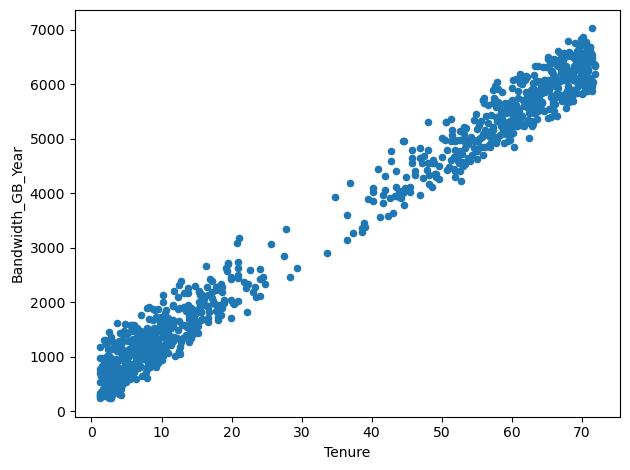

In [46]:
#Create a scatter plot to visualize the continuous variables and test for relationship
churn_data[churn_data['Bandwidth_GB_Year'] < 8000].sample(1000).plot.scatter(x='Tenure',
                                                                            y='Bandwidth_GB_Year')
plt.tight_layout()

In [47]:
#Re-expression of Categorical variables
#Re-express categorical variables for the ordinal columns

churn_data['Techie'] = churn_data['Techie'].map(
    {'Yes':1, 'No':0})
churn_data['Techie'].head(10)

0    0
1    1
2    1
3    1
4    0
5    0
6    1
7    1
8    0
9    0
Name: Techie, dtype: int64

In [48]:
#Re-express categorical variables for the ordinal columns
churn_data['Port_modem'] = churn_data['Port_modem'].map(
    {'Yes':1, 'No':0})
churn_data['Port_modem'].head(10)

0    1
1    0
2    1
3    0
4    1
5    1
6    0
7    0
8    1
9    1
Name: Port_modem, dtype: int64

In [49]:
#Perform one-hot encoding to re-express categorical values
#print each unique element in all columns that need one-hot encoding
print(churn_data['Area'].unique())
print(churn_data['Marital'].unique())
print(churn_data['Gender'].unique())
print(churn_data['Contract'].unique())
print(churn_data['InternetService'].unique())

['Urban' 'Suburban' 'Rural']
['Widowed' 'Married' 'Separated' 'Never Married' 'Divorced']
['Male' 'Female' 'Nonbinary']
['One year' 'Month-to-month' 'Two Year']
['Fiber Optic' 'DSL' 'Not Provided']


In [50]:
#Use get_dummies() function to encode all nominal categorical columns
#We are going to use the drop_first arguement to drop one of the hot-one columns that was created to avoid multicollinearity
churn_encoded_data = pd.get_dummies(churn_data, dtype=int, drop_first=True, columns = ['Area','Marital','Gender','Contract','InternetService'])
churn_encoded_data.head(10)

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,Marital_Married,Marital_Never Married,Marital_Separated,Marital_Widowed,Gender_Male,Gender_Nonbinary,Contract_One year,Contract_Two Year,InternetService_Fiber Optic,InternetService_Not Provided
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,...,0,0,0,1,1,0,1,0,1,0
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,...,1,0,0,0,0,0,0,0,1,0
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,...,0,0,0,1,0,0,0,1,0,0
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,...,1,0,0,0,1,0,0,1,0,0
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,...,0,0,1,0,1,0,0,0,1,0
5,6,W303516,2b451d12-6c2b-4cea-a295-ba1d6bced078,97598fd95658c80500546bc1dd312994,Fort Valley,GA,Peach,31030,32.57032,-83.89040,...,0,1,0,0,0,0,1,0,0,1
6,7,U335188,6630d501-838c-4be4-a59c-6f58c814ed6a,87d1c4223e49156020564c01a88973b9,Pioneer,TN,Scott,37847,36.43420,-84.27892,...,0,0,0,1,1,0,0,0,0,0
7,8,V538685,70ddaa89-b726-49dc-9022-2d655e4c7936,fce3f21888317907de42e298d718ccce,Oklahoma City,OK,Oklahoma,73109,35.43313,-97.52463,...,1,0,0,0,0,0,0,0,0,0
8,9,M716771,05a49ee3-8fd5-453a-a5f3-82b6cd986856,6c7043ced703b84de29766af3d53c976,Saint Cloud,FL,Osceola,34771,28.27646,-81.16273,...,0,0,1,0,0,1,0,0,0,0
9,10,I676080,86f17e4d-2c24-4b70-a6ec-dddf0609dbaa,6ffe183271258a039e122ced8750b2a0,Cincinnati,OH,Hamilton,45237,39.19296,-84.45230,...,1,0,0,0,0,0,0,1,1,0


In [51]:
#Save the cleaned and wrangled data to a CSV file
churn_encoded_data.to_csv('C:/Users/sered/OneDrive/Desktop/WGU Masters Degree/D208/Cleaned_Wrangled_Data.csv')

In [52]:
#create a dataframe to hold all independent variables
#Constant column is added to the dataframe 
x = pd.DataFrame(churn_encoded_data[['Area_Suburban','Area_Urban','Marital_Widowed','Marital_Married','Marital_Separated','Marital_Never Married','Gender_Male','Gender_Nonbinary','Contract_One year',
                             'Contract_Two Year', 'InternetService_Fiber Optic','InternetService_Not Provided','Children','Income','Outage_sec_perweek','Tenure','Port_modem','Techie']].assign(const=1))

#create a dataframe to hold the dependent variable that is being tested
y = pd.DataFrame(churn_encoded_data[['Bandwidth_GB_Year']])

x.head(5)

,Area_Suburban,Area_Urban,Marital_Widowed,Marital_Married,Marital_Separated,Marital_Never Married,Gender_Male,Gender_Nonbinary,Contract_One year,Contract_Two Year,InternetService_Fiber Optic,InternetService_Not Provided,Children,Income,Outage_sec_perweek,Tenure,Port_modem,Techie,const
0,0,1,1,0,0,0,1,0,1,0,1,0,0,28561.99,7.978323,6.795513,1,0,1
1,0,1,0,1,0,0,0,0,0,0,1,0,1,21704.77,11.699080,1.156681,0,1,1
2,0,1,1,0,0,0,0,0,0,1,0,0,4,9609.57,10.752800,15.754144,1,1,1
3,1,0,0,1,0,0,1,0,0,1,0,0,1,18925.23,14.913540,17.087227,0,1,1
4,1,0,0,0,1,0,1,0,0,0,1,0,0,40074.19,8.147417,1.670972,1,0,1


In [53]:
#Run the multiple regression model and show results
mode101 = sm.OLS(y, x).fit()
print(mode101.summary())

                            OLS Regression Results                            
Dep. Variable:      Bandwidth_GB_Year   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 7.341e+04
Date:                Wed, 10 Jul 2024   Prob (F-statistic):               0.00
Time:                        10:26:16   Log-Likelihood:                -66618.
No. Observations:               10000   AIC:                         1.333e+05
Df Residuals:                    9981   BIC:                         1.334e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Area_Suburban   

In [54]:
#Create a new dataframe to hold all of the fields from the original dataframe that need to be standardized
churn_standardized = pd.DataFrame(churn_encoded_data[['Area_Suburban','Area_Urban','Marital_Widowed','Marital_Married','Marital_Separated','Marital_Never Married','Gender_Male','Gender_Nonbinary','Contract_One year',
                             'Contract_Two Year', 'InternetService_Fiber Optic','InternetService_Not Provided','Children','Income','Outage_sec_perweek','Tenure','Port_modem','Techie', 'Bandwidth_GB_Year']].assign(const=1))

#Find z-score for all multiple linear regression fields
df_zscore = pd.DataFrame(preprocessing.StandardScaler().fit_transform(churn_standardized), columns=churn_standardized.columns)
df_zscore.head()

,Area_Suburban,Area_Urban,Marital_Widowed,Marital_Married,Marital_Separated,Marital_Never Married,Gender_Male,Gender_Nonbinary,Contract_One year,Contract_Two Year,InternetService_Fiber Optic,InternetService_Not Provided,Children,Income,Outage_sec_perweek,Tenure,Port_modem,Techie,Bandwidth_GB_Year,const
0,-0.709123,1.416231,1.983280,-0.486052,-0.502187,-0.493115,1.052581,-0.153773,1.938395,-0.568420,1.126323,-0.520083,-0.972338,-0.398778,-0.679978,-1.048746,1.033770,-0.449198,-1.138487,0.0
1,-0.709123,1.416231,-0.504215,2.057392,-0.502187,-0.493115,-0.950046,-0.153773,-0.515891,-0.568420,1.126323,-0.520083,-0.506592,-0.641954,0.570331,-1.262001,-0.967333,2.226191,-1.185876,0.0
2,-0.709123,1.416231,1.983280,-0.486052,-0.502187,-0.493115,-0.950046,-0.153773,-0.515891,1.759262,-0.887845,-0.520083,0.890646,-1.070885,0.252347,-0.709940,1.033770,2.226191,-0.612138,0.0
3,1.410193,-0.706099,-0.504215,2.057392,-0.502187,-0.493115,1.052581,-0.153773,-0.515891,1.759262,-0.887845,-0.520083,-0.506592,-0.740525,1.650506,-0.659524,-0.967333,2.226191,-0.561857,0.0
4,1.410193,-0.706099,-0.504215,-0.486052,1.991292,-0.493115,1.052581,-0.153773,-0.515891,-0.568420,1.126323,-0.520083,-0.972338,0.009478,-0.623156,-1.242551,1.033770,-0.449198,-1.428184,0.0


In [55]:
#Create new MLR model with the standardized data to get a better representation of which factors play the biggest roles in bandwidth per year. 
x_stand = pd.DataFrame(df_zscore[['Area_Suburban','Area_Urban','Marital_Widowed','Marital_Married','Marital_Separated','Marital_Never Married','Gender_Male','Gender_Nonbinary','Contract_One year',
                             'Contract_Two Year', 'InternetService_Fiber Optic','InternetService_Not Provided','Children','Income','Outage_sec_perweek','Tenure','Port_modem','Techie']])

y_stand = pd.DataFrame(df_zscore[['Bandwidth_GB_Year']])

x_stand.head()

,Area_Suburban,Area_Urban,Marital_Widowed,Marital_Married,Marital_Separated,Marital_Never Married,Gender_Male,Gender_Nonbinary,Contract_One year,Contract_Two Year,InternetService_Fiber Optic,InternetService_Not Provided,Children,Income,Outage_sec_perweek,Tenure,Port_modem,Techie
0,-0.709123,1.416231,1.983280,-0.486052,-0.502187,-0.493115,1.052581,-0.153773,1.938395,-0.568420,1.126323,-0.520083,-0.972338,-0.398778,-0.679978,-1.048746,1.033770,-0.449198
1,-0.709123,1.416231,-0.504215,2.057392,-0.502187,-0.493115,-0.950046,-0.153773,-0.515891,-0.568420,1.126323,-0.520083,-0.506592,-0.641954,0.570331,-1.262001,-0.967333,2.226191
2,-0.709123,1.416231,1.983280,-0.486052,-0.502187,-0.493115,-0.950046,-0.153773,-0.515891,1.759262,-0.887845,-0.520083,0.890646,-1.070885,0.252347,-0.709940,1.033770,2.226191
3,1.410193,-0.706099,-0.504215,2.057392,-0.502187,-0.493115,1.052581,-0.153773,-0.515891,1.759262,-0.887845,-0.520083,-0.506592,-0.740525,1.650506,-0.659524,-0.967333,2.226191
4,1.410193,-0.706099,-0.504215,-0.486052,1.991292,-0.493115,1.052581,-0.153773,-0.515891,-0.568420,1.126323,-0.520083,-0.972338,0.009478,-0.623156,-1.242551,1.033770,-0.449198


In [56]:
#Create new OLS model displaying the coefficients after standardization. The R-Squared and all other important variables stayed the same. 
#The standardizing makes it so that all the coefficients are being judged based off of the same scale which makes it easier to see which is most related to Bandwidth.

standardized_model = sm.OLS(y_stand, x_stand).fit()
print(standardized_model.summary())

                                 OLS Regression Results                                
Dep. Variable:      Bandwidth_GB_Year   R-squared (uncentered):                   0.993
Model:                            OLS   Adj. R-squared (uncentered):              0.992
Method:                 Least Squares   F-statistic:                          7.342e+04
Date:                Wed, 10 Jul 2024   Prob (F-statistic):                        0.00
Time:                        10:26:17   Log-Likelihood:                          10277.
No. Observations:               10000   AIC:                                 -2.052e+04
Df Residuals:                    9982   BIC:                                 -2.039e+04
Df Model:                          18                                                  
Covariance Type:            nonrobust                                                  
                                   coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

In [57]:
#Backward elimination
#Choose a significance level for P. I will use 0.05.
x_stand = np.append(arr = np.ones((10000,1)).astype(int),
                    values = x, axis = 1)


#Show all results to use as starting point for p value. Fit the model so that we can start working.
x_opt = x_stand[:, [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]]
standardized_model=sm.OLS(y, x_opt).fit()
print(standardized_model.summary())

                            OLS Regression Results                            
Dep. Variable:      Bandwidth_GB_Year   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 7.341e+04
Date:                Wed, 10 Jul 2024   Prob (F-statistic):               0.00
Time:                        10:26:17   Log-Likelihood:                -66618.
No. Observations:               10000   AIC:                         1.333e+05
Df Residuals:                    9981   BIC:                         1.334e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        720.4197      9.946     72.430      0.0

In [58]:
#Remove the x14 value because it has the highest p value greater than 0.05
x_opt = x_stand[:, [0,1,2,3,4,5,6,7,8,9,10,11,12,13,15,16,17,18]]
standardized_model=sm.OLS(y, x_opt).fit()
print(standardized_model.summary())

                            OLS Regression Results                            
Dep. Variable:      Bandwidth_GB_Year   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 7.773e+04
Date:                Wed, 10 Jul 2024   Prob (F-statistic):               0.00
Time:                        10:26:17   Log-Likelihood:                -66618.
No. Observations:               10000   AIC:                         1.333e+05
Df Residuals:                    9982   BIC:                         1.334e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        720.4153      9.539     75.520      0.0

In [59]:
#Remove the x1 value because it has the highest p value greater than 0.05
x_opt = x_stand[:, [0,2,3,4,5,6,7,8,9,10,11,12,13,15,16,17,18]]
standardized_model=sm.OLS(y, x_opt).fit()
print(standardized_model.summary())

                            OLS Regression Results                            
Dep. Variable:      Bandwidth_GB_Year   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 8.260e+04
Date:                Wed, 10 Jul 2024   Prob (F-statistic):               0.00
Time:                        10:26:17   Log-Likelihood:                -66618.
No. Observations:               10000   AIC:                         1.333e+05
Df Residuals:                    9983   BIC:                         1.334e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        720.5074      9.245     77.934      0.0

In [60]:
#Remove the x2 value because it has the highest p value greater than 0.05
x_opt = x_stand[:, [0,2,4,5,6,7,8,9,10,11,12,13,15,16,17,18]]
standardized_model=sm.OLS(y, x_opt).fit()
print(standardized_model.summary())

                            OLS Regression Results                            
Dep. Variable:      Bandwidth_GB_Year   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 8.812e+04
Date:                Wed, 10 Jul 2024   Prob (F-statistic):               0.00
Time:                        10:26:17   Log-Likelihood:                -66618.
No. Observations:               10000   AIC:                         1.333e+05
Df Residuals:                    9984   BIC:                         1.334e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        719.9645      8.774     82.057      0.0

In [61]:
#Remove the x1 value because it has the highest p value greater than 0.05
x_opt = x_stand[:, [0,4,5,6,7,8,9,10,11,12,13,15,16,17,18]]
standardized_model=sm.OLS(y, x_opt).fit()
print(standardized_model.summary())

                            OLS Regression Results                            
Dep. Variable:      Bandwidth_GB_Year   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 9.442e+04
Date:                Wed, 10 Jul 2024   Prob (F-statistic):               0.00
Time:                        10:26:17   Log-Likelihood:                -66618.
No. Observations:               10000   AIC:                         1.333e+05
Df Residuals:                    9985   BIC:                         1.334e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        719.5925      8.666     83.038      0.0

In [62]:
#Remove the x13 value because it has the highest p value greater than 0.05
x_opt = x_stand[:, [0,4,5,6,7,8,9,10,11,12,13,15,16,18]]
standardized_model=sm.OLS(y, x_opt).fit()
print(standardized_model.summary())

                            OLS Regression Results                            
Dep. Variable:      Bandwidth_GB_Year   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 1.017e+05
Date:                Wed, 10 Jul 2024   Prob (F-statistic):               0.00
Time:                        10:26:17   Log-Likelihood:                -66618.
No. Observations:               10000   AIC:                         1.333e+05
Df Residuals:                    9986   BIC:                         1.334e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        719.0809      8.487     84.723      0.0

In [63]:
#Remove the x3 value because it has the highest p value greater than 0.05
x_opt = x_stand[:, [0,4,5,7,8,9,10,11,12,13,15,16,18]]
standardized_model=sm.OLS(y, x_opt).fit()
print(standardized_model.summary())

                            OLS Regression Results                            
Dep. Variable:      Bandwidth_GB_Year   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 1.102e+05
Date:                Wed, 10 Jul 2024   Prob (F-statistic):               0.00
Time:                        10:26:17   Log-Likelihood:                -66618.
No. Observations:               10000   AIC:                         1.333e+05
Df Residuals:                    9987   BIC:                         1.334e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        718.4874      8.301     86.552      0.0

In [64]:
#Remove the x1 value because it has the highest p value greater than 0.05
x_opt = x_stand[:, [0,5,7,8,9,10,11,12,13,15,16,18]]
standardized_model=sm.OLS(y, x_opt).fit()
print(standardized_model.summary())

                            OLS Regression Results                            
Dep. Variable:      Bandwidth_GB_Year   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 1.202e+05
Date:                Wed, 10 Jul 2024   Prob (F-statistic):               0.00
Time:                        10:26:17   Log-Likelihood:                -66618.
No. Observations:               10000   AIC:                         1.333e+05
Df Residuals:                    9988   BIC:                         1.333e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        717.9686      8.233     87.208      0.0

In [65]:
#Remove the x3 value because it has the highest p value greater than 0.05
x_opt = x_stand[:, [0,5,7,9,10,11,12,13,15,16,18]]
standardized_model=sm.OLS(y, x_opt).fit()
print(standardized_model.summary())

                            OLS Regression Results                            
Dep. Variable:      Bandwidth_GB_Year   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 1.322e+05
Date:                Wed, 10 Jul 2024   Prob (F-statistic):               0.00
Time:                        10:26:17   Log-Likelihood:                -66618.
No. Observations:               10000   AIC:                         1.333e+05
Df Residuals:                    9989   BIC:                         1.333e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        717.5729      8.211     87.394      0.0

In [66]:
#Remove the x10 value because it has the highest p value greater than 0.05
x_opt = x_stand[:, [0,5,7,9,10,11,12,13,15,16]]
standardized_model=sm.OLS(y, x_opt).fit()
print(standardized_model.summary())

                            OLS Regression Results                            
Dep. Variable:      Bandwidth_GB_Year   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 1.469e+05
Date:                Wed, 10 Jul 2024   Prob (F-statistic):               0.00
Time:                        10:26:17   Log-Likelihood:                -66618.
No. Observations:               10000   AIC:                         1.333e+05
Df Residuals:                    9990   BIC:                         1.333e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        718.2739      8.155     88.075      0.0

In [67]:
#Remove the x4 value because it has the highest p value greater than 0.05
x_opt = x_stand[:, [0,5,7,10,11,12,13,15,16]]
standardized_model=sm.OLS(y, x_opt).fit()
print(standardized_model.summary())

                            OLS Regression Results                            
Dep. Variable:      Bandwidth_GB_Year   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 1.652e+05
Date:                Wed, 10 Jul 2024   Prob (F-statistic):               0.00
Time:                        10:26:17   Log-Likelihood:                -66621.
No. Observations:               10000   AIC:                         1.333e+05
Df Residuals:                    9991   BIC:                         1.333e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        721.1238      8.044     89.650      0.0

In [68]:
#Remove the x3 value because it has the highest p value greater than 0.05
x_opt = x_stand[:, [0,5,7,11,12,13,15,16]]
standardized_model=sm.OLS(y, x_opt).fit()
print(standardized_model.summary())

                            OLS Regression Results                            
Dep. Variable:      Bandwidth_GB_Year   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 1.889e+05
Date:                Wed, 10 Jul 2024   Prob (F-statistic):               0.00
Time:                        10:26:17   Log-Likelihood:                -66621.
No. Observations:               10000   AIC:                         1.333e+05
Df Residuals:                    9992   BIC:                         1.333e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        721.3132      7.996     90.211      0.0

In [69]:
#Remove the x1 value because it has the highest p value greater than 0.05
x_opt = x_stand[:, [0,7,11,12,13,15,16]]
standardized_model=sm.OLS(y, x_opt).fit()
print(standardized_model.summary())

                            OLS Regression Results                            
Dep. Variable:      Bandwidth_GB_Year   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 2.203e+05
Date:                Wed, 10 Jul 2024   Prob (F-statistic):               0.00
Time:                        10:26:17   Log-Likelihood:                -66622.
No. Observations:               10000   AIC:                         1.333e+05
Df Residuals:                    9993   BIC:                         1.333e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        722.5849      7.948     90.912      0.0

In [70]:
x = x.drop(['Area_Suburban','Area_Urban','Marital_Widowed','Marital_Married','Marital_Separated','Marital_Never Married',
             'Gender_Nonbinary','Contract_One year','Contract_Two Year','Income','Port_modem','Techie'], axis=1)

mode101 = sm.OLS(y, x).fit()
print(mode101.summary())

                            OLS Regression Results                            
Dep. Variable:      Bandwidth_GB_Year   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 2.203e+05
Date:                Wed, 10 Jul 2024   Prob (F-statistic):               0.00
Time:                        10:26:17   Log-Likelihood:                -66622.
No. Observations:               10000   AIC:                         1.333e+05
Df Residuals:                    9993   BIC:                         1.333e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Gender_Male     

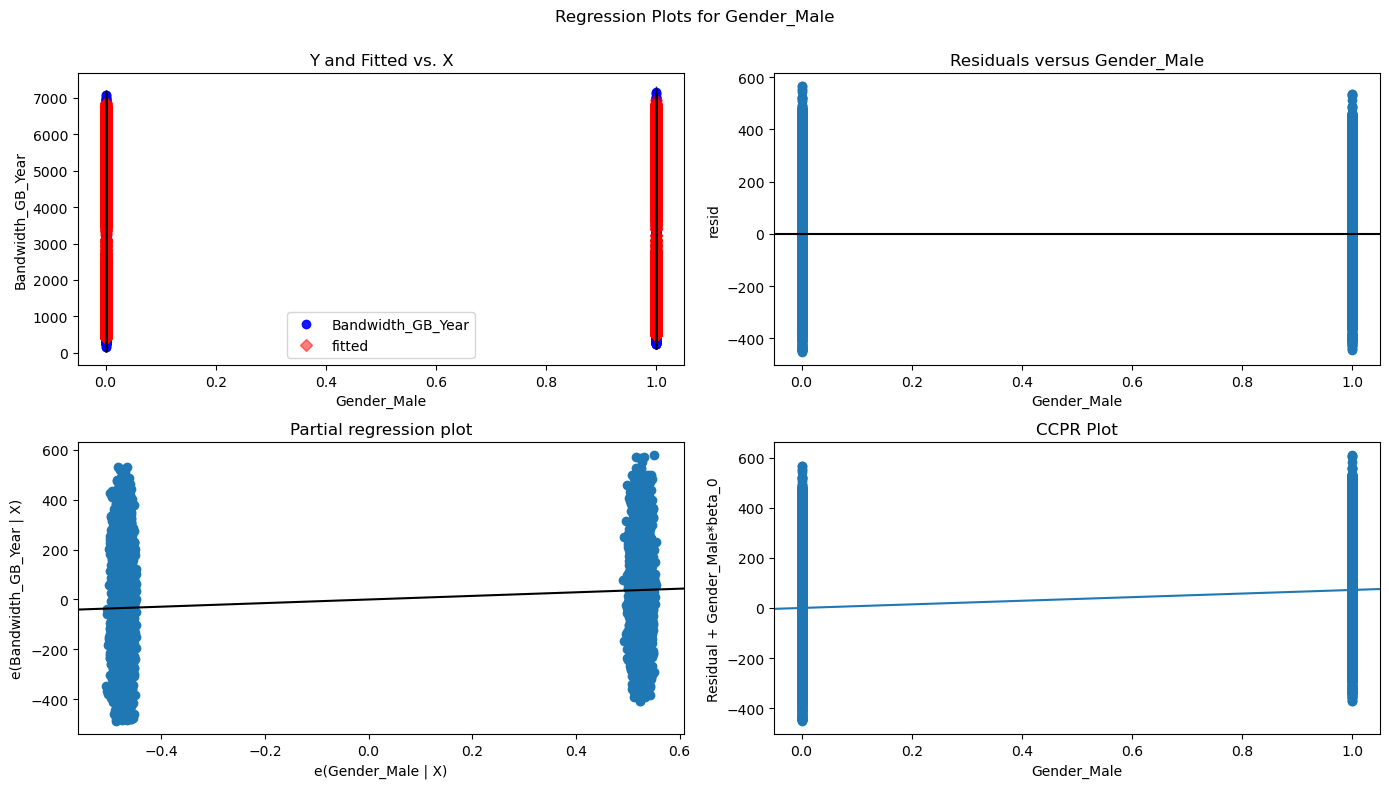

In [71]:
#Create Residual Plots for all residuals compared to the fitted value of y
fig = plt.figure(figsize=(14, 8)) 

#Create risudal plots for 
fig = sm.graphics.plot_regress_exog(mode101, 'Gender_Male', fig=fig) 

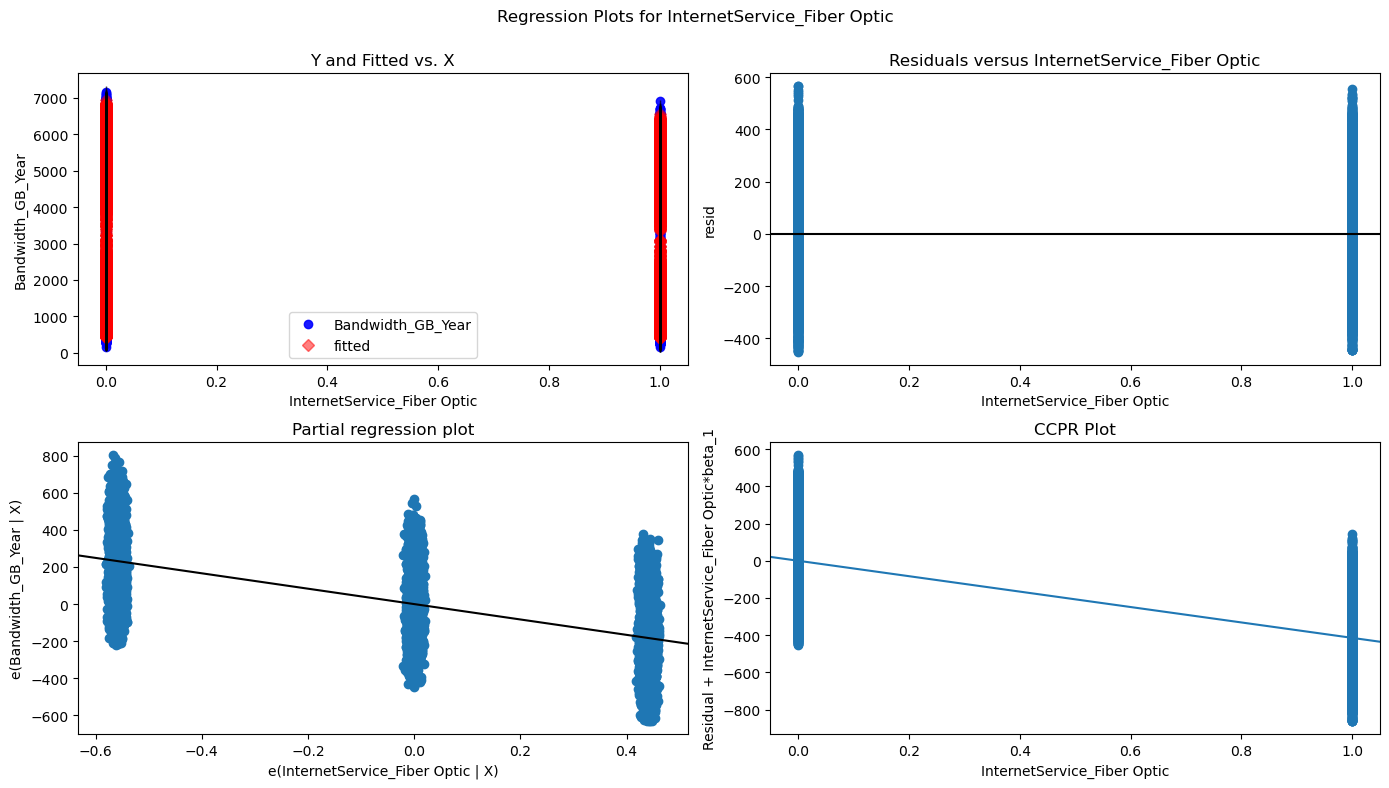

In [72]:
#Create Residual Plots for all residuals compared to the fitted value of y
fig = plt.figure(figsize=(14, 8)) 

#Create risudal plots for 
fig = sm.graphics.plot_regress_exog(mode101, 'InternetService_Fiber Optic', fig=fig) 

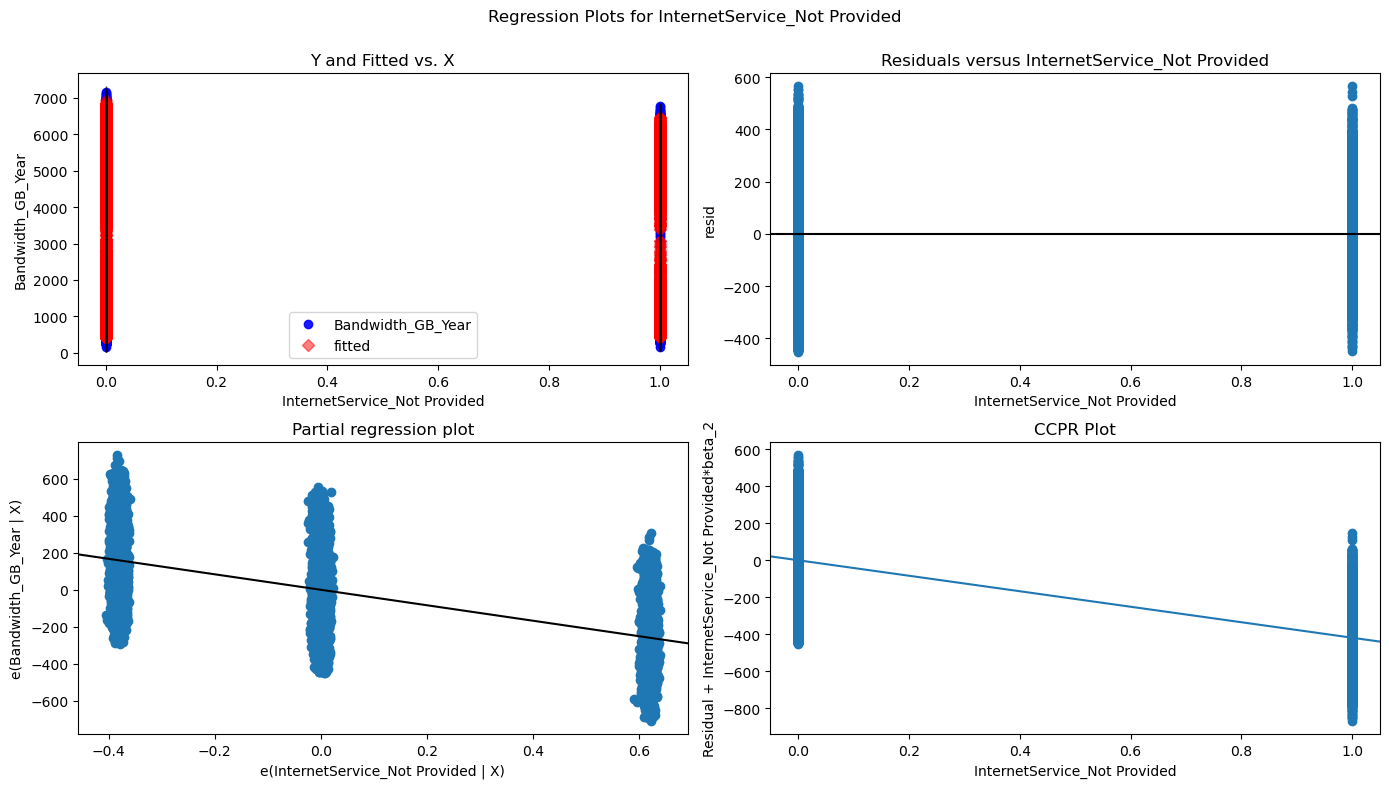

In [73]:
#Create Residual Plots for all residuals compared to the fitted value of y
fig = plt.figure(figsize=(14, 8)) 

#Create risudal plots for 
fig = sm.graphics.plot_regress_exog(mode101, 'InternetService_Not Provided', fig=fig) 

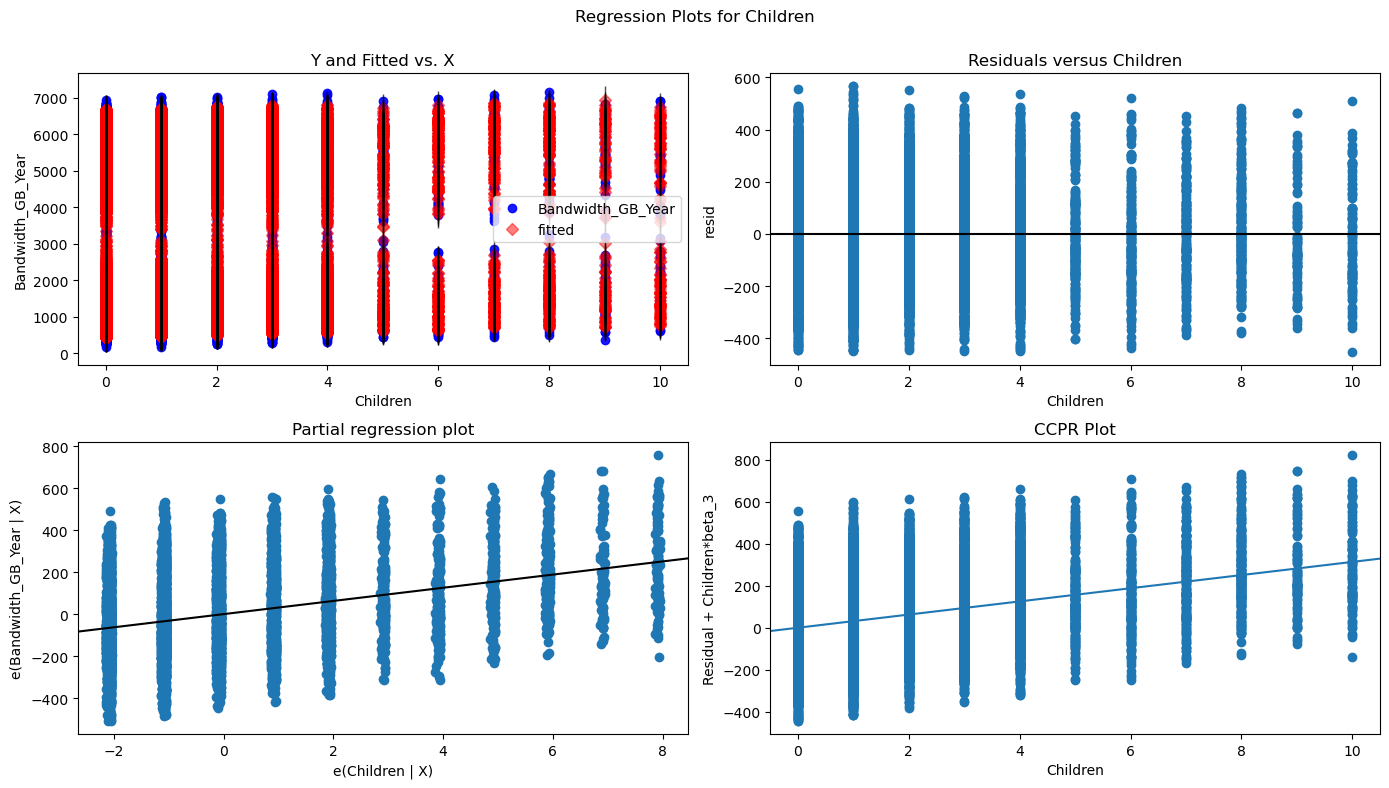

In [74]:
#Create Residual Plots for all residuals compared to the fitted value of y
fig = plt.figure(figsize=(14, 8)) 

#Create risudal plots for 
fig = sm.graphics.plot_regress_exog(mode101, 'Children', fig=fig) 

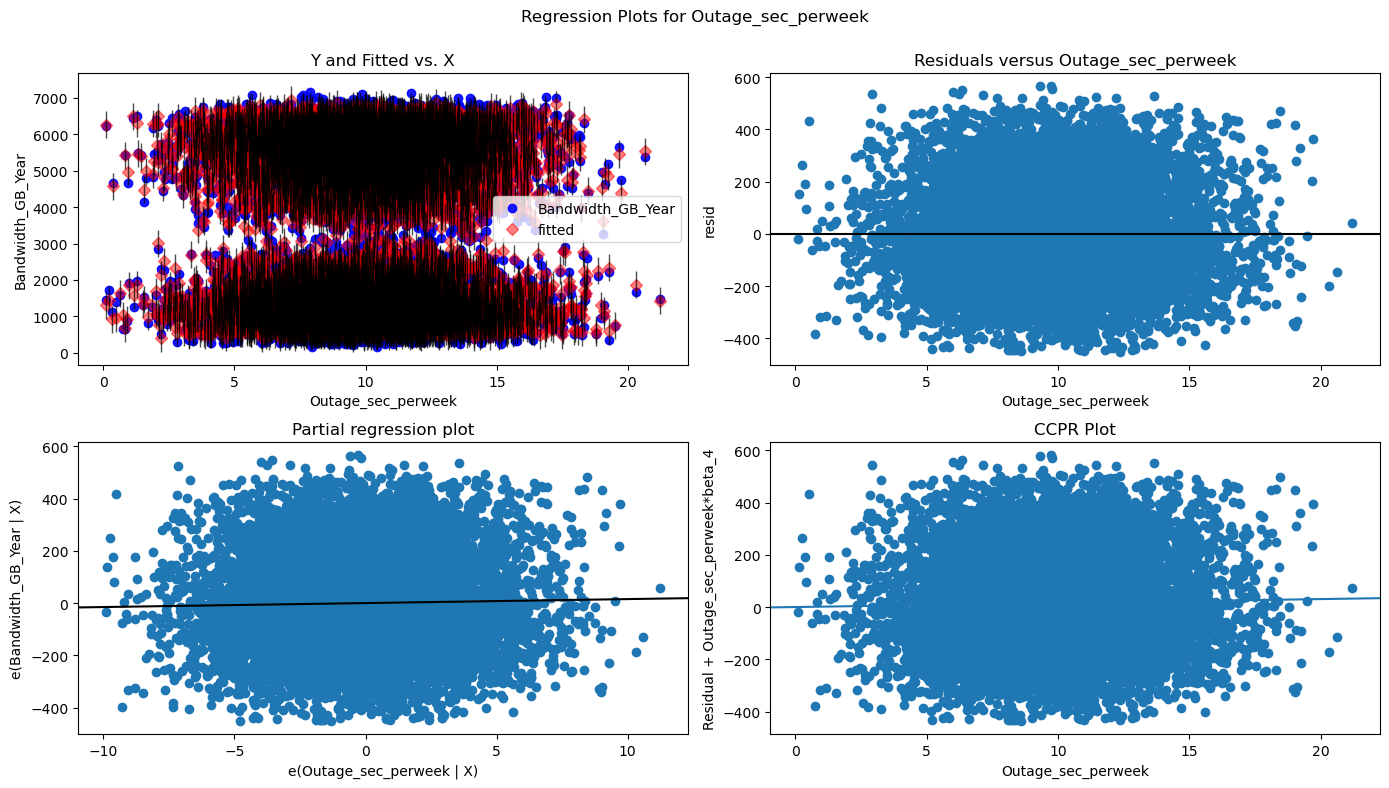

In [75]:
#Create Residual Plots for all residuals compared to the fitted value of y
fig = plt.figure(figsize=(14, 8)) 

#Create risudal plots for 
fig = sm.graphics.plot_regress_exog(mode101, 'Outage_sec_perweek', fig=fig) 

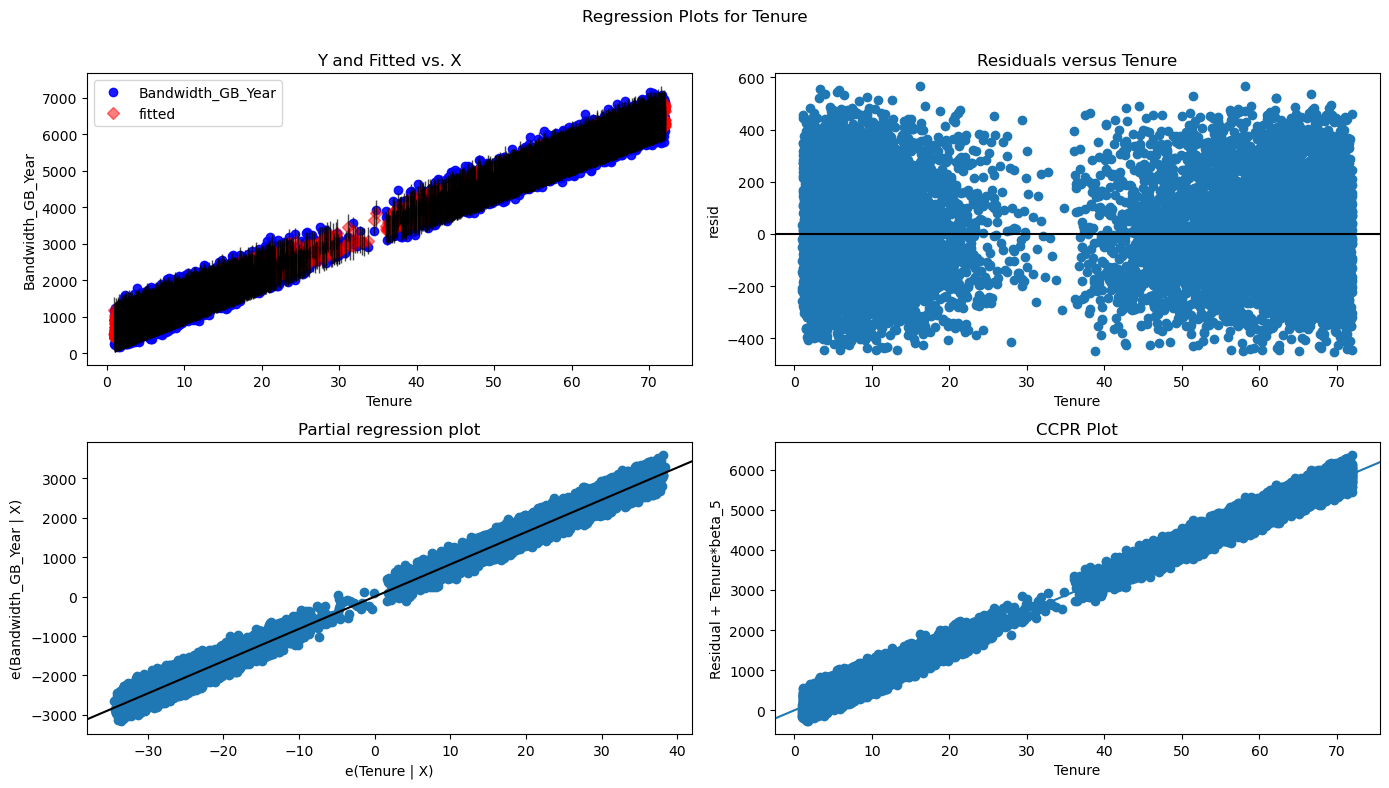

In [76]:
#Create Residual Plots for all residuals compared to the fitted value of y
fig = plt.figure(figsize=(14, 8)) 

#Create risudal plots for 
fig = sm.graphics.plot_regress_exog(mode101, 'Tenure', fig=fig) 

In [77]:
#calculate the residual standard error
np.sqrt(mode101.mse_resid)

189.34834376261864